In [1]:
!pip install transformers torch

In [3]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
file_path = 'headlines/merged_file.csv'
data = pd.read_csv(file_path)

In [9]:
# Step 4: Load the pre-trained sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

In [10]:
# Step 5: Define a function to get sentiment for a given text
def get_sentiment(text):
    result = sentiment_pipeline(text)
    return result[0]['label'], result[0]['score']

In [11]:
# Step 6: Apply the function to the headlines
data['sentiment'], data['confidence'] = zip(*data['headline'].apply(get_sentiment))

In [15]:
data.head()

,headline,date,web_url,doc_type,lead_paragraph,material_type,author,section,subsection,keywords,sentiment,confidence
0,Kissinger's Nobel Cash Goes to Children of G.I.'s,1973-12-01,https://www.nytimes.com/1973/12/01/archives/ki...,article,"OSLO, Nov. 30 (Reuters)—Secretary of State Kis...",Archives,NaN,Archives,NaN,['Vietnam'],LABEL_1,0.865003
1,Notes on People,1973-12-01,https://www.nytimes.com/1973/12/01/archives/a-...,article,"Unassisted except for crutches, Edward M. Kenn...",Archives,Albin Krebs,Archives,NaN,['Vietnam'],LABEL_1,0.799245
2,U.S. Plans to Seek New Nuclear Arms In Case Ta...,1973-12-01,https://www.nytimes.com/1973/12/01/archives/us...,article,"WASHINGTON, Nov. 30—Secretary of Defense James...",Archives,By John W. Finney Special to The New York Times,Archives,NaN,['Vietnam'],LABEL_1,0.657209
3,War Isn't Over For Them—Their Son Must Stay in...,1973-12-02,https://www.nytimes.com/1973/12/02/archives/wa...,article,"SHARON, Vt. — Very few people here have ?? to ...",Archives,By Gloria Emerson Special to The New York Times,Archives,NaN,[],LABEL_1,0.625153
4,WAR HERO FACES COCAINE CHARGES,1973-12-03,https://www.nytimes.com/1973/12/03/archives/wa...,article,"PETALUMA, Calif., Dec. 2 —“Heroes are just ord...",Archives,NaN,Archives,NaN,['Vietnam'],LABEL_1,0.872706


In [17]:
# Step 7: Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Step 8: Sort the dataframe by date
data = data.sort_values(by='date')


In [18]:
# Step 9: Calculate the average sentiment score per month
data['year_month'] = data['date'].dt.to_period('M')
average_sentiment_per_month = data.groupby('year_month')['confidence'].mean().reset_index()
average_sentiment_per_month['year_month'] = average_sentiment_per_month['year_month'].dt.to_timestamp()


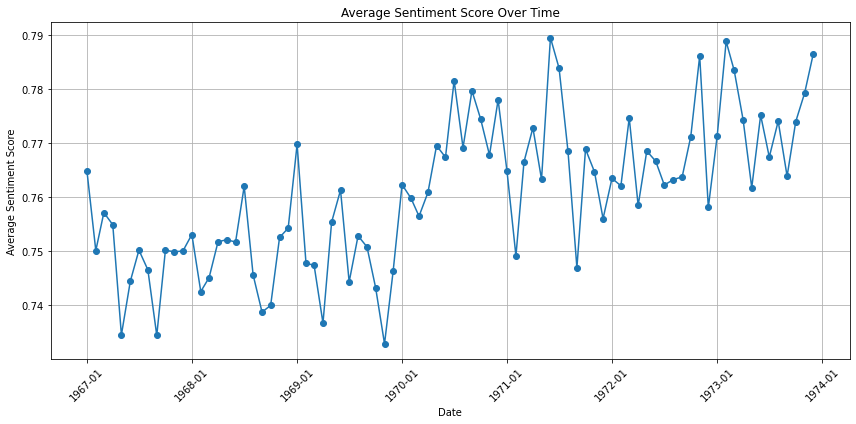

In [20]:
# Step 10: Plot the average sentiment score over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_month['year_month'], average_sentiment_per_month['confidence'], marker='o')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)

# Formatting the date on x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
from scipy.ndimage import gaussian_filter1d

In [38]:
# Step 10: Smooth the sentiment scores using a Gaussian filter
average_sentiment_per_month['smoothed_confidence'] = gaussian_filter1d(average_sentiment_per_month['confidence'], sigma=2)

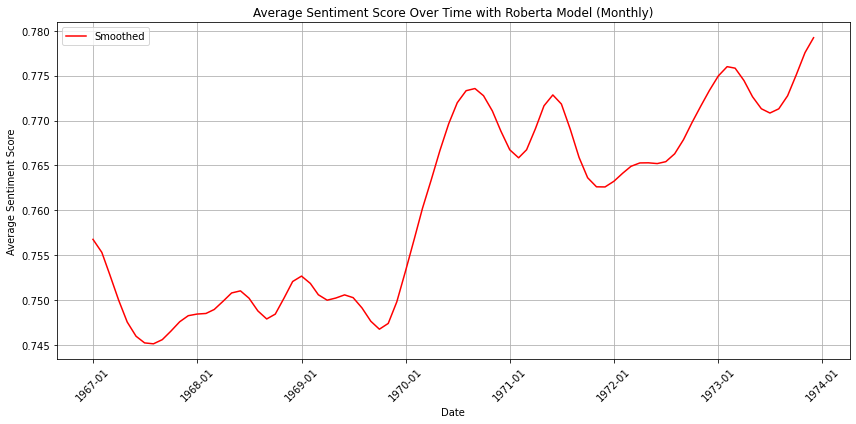

In [65]:
# Step 11: Plot the average sentiment score over time
plt.figure(figsize=(12, 6))
# plt.plot(average_sentiment_per_month['year_month'], average_sentiment_per_month['confidence'], marker='o', label='Original')
plt.plot(average_sentiment_per_month['year_month'], average_sentiment_per_month['smoothed_confidence'], label='Smoothed', color='red')
plt.title('Average Sentiment Score Over Time with Roberta Model (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Formatting the date on x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Map sentiment labels to descriptive names
sentiment_mapping = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}
data['sentiment'] = data['sentiment'].map(sentiment_mapping)


In [36]:
data.head()

,headline,date,web_url,doc_type,lead_paragraph,material_type,author,section,subsection,keywords,sentiment,confidence,year_month
21481,In The Nation: Saigon in the New Year,1967-01-01,https://www.nytimes.com/1967/01/01/archives/in...,article,NaN,Archives,By Tom Wicker,Archives,NaN,"['Vietnam', 'Vietnam']",Neutral,0.923741,1967-01
21503,Bonn Aide Says U.S. Merits World Gratitude on ...,1967-01-01,https://www.nytimes.com/1967/01/01/archives/bo...,article,NaN,Archives,NaN,Archives,NaN,['Vietnam'],Neutral,0.699939,1967-01
21502,ATTACKS ON NORTH DISRUPT ECONOMY; But Hanoi Fe...,1967-01-01,https://www.nytimes.com/1967/01/01/archives/at...,article,NaN,Archives,By Harrison E. Salisbury Special To the New Yo...,Archives,NaN,"['Vietnam', 'Vietnam']",Negative,0.666739,1967-01
21501,Hanoi Charges Raids On Residential Areas,1967-01-01,https://www.nytimes.com/1967/01/01/archives/ha...,article,NaN,Archives,NaN,Archives,NaN,['Vietnam'],Neutral,0.624662,1967-01
21500,Tokyo Newspaper Bids U.S. 'Gamble' On Bombing ...,1967-01-01,https://www.nytimes.com/1967/01/01/archives/to...,article,NaN,Archives,NaN,Archives,NaN,['Vietnam'],Neutral,0.678108,1967-01


In [32]:
# Step 7: Aggregate the total count of each sentiment across all time
total_sentiment_count = data['sentiment'].value_counts()

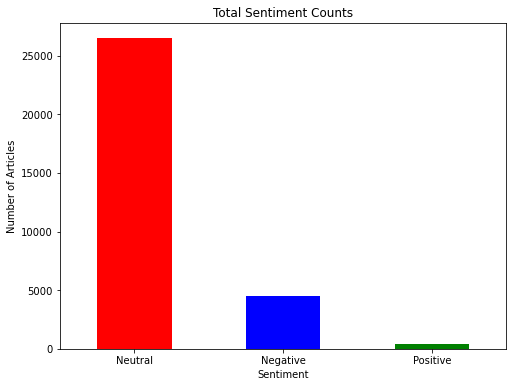

In [33]:
# Step 8: Plot the sentiment counts as a bar chart
plt.figure(figsize=(8, 6))
total_sentiment_count.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Total Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

In [35]:
# Filter the DataFrame where headline_sentiment is 'Positive'
positive_articles = data[data['sentiment'] == 'Positive']

# Count the number of positive articles
num_positive_articles = positive_articles.shape[0]

print(f"Number of articles with positive sentiment: {num_positive_articles}")

# Filter the DataFrame where headline_sentiment is 'Negative'
negative_articles = data[data['sentiment'] == 'Negative']

# Count the number of negative articles
num_negative_articles = negative_articles.shape[0]

print(f"Number of articles with negative sentiment: {num_negative_articles}")

# Filter the DataFrame where headline_sentiment is 'Neutral'
neutral_articles = data[data['sentiment'] == 'Neutral']

# Count the number of neutral articles
num_neutral_articles = neutral_articles.shape[0]

print(f"Number of articles with neutral sentiment: {num_neutral_articles}")

print(len(data['headline']))

Number of articles with positive sentiment: 440
Number of articles with negative sentiment: 4487
Number of articles with neutral sentiment: 26489
31416


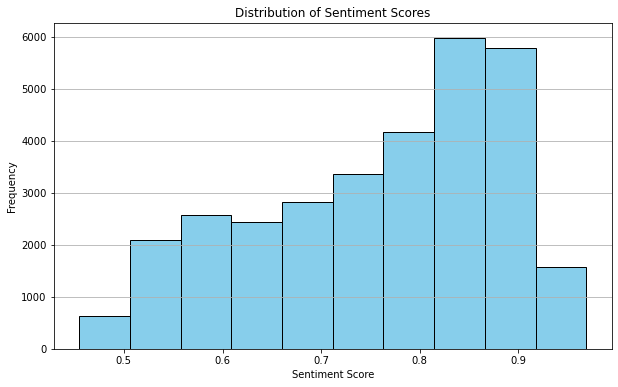

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(data['confidence'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [45]:
# Function to calculate the percentage of each sentiment
def calculate_sentiment_percentages(dataframe):
    total_count = len(dataframe)
    sentiment_counts = dataframe['sentiment'].value_counts()
    sentiment_percentages = (sentiment_counts / total_count) * 100
    return sentiment_percentages

In [46]:
# Calculate sentiment percentages
sentiment_percentages = calculate_sentiment_percentages(data)

# Print sentiment percentages
print(sentiment_percentages)

Neutral     84.316909
Negative    14.282531
Positive     1.400560
Name: sentiment, dtype: float64


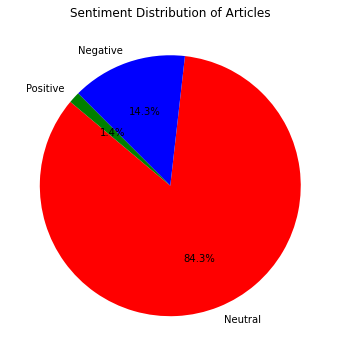

In [47]:
# Plot sentiment percentages as a pie chart
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
sentiment_percentages.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution of Articles')
plt.ylabel('')  # Hide the y-label
plt.show()

In [53]:
# Step 7: Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Step 8: Sort the dataframe by date
data = data.sort_values(by='date')

# Step 9: Calculate the average sentiment score per day
average_sentiment_per_day = data.groupby(data['date'].dt.date)['confidence'].mean().reset_index()
average_sentiment_per_day['date'] = pd.to_datetime(average_sentiment_per_day['date'])


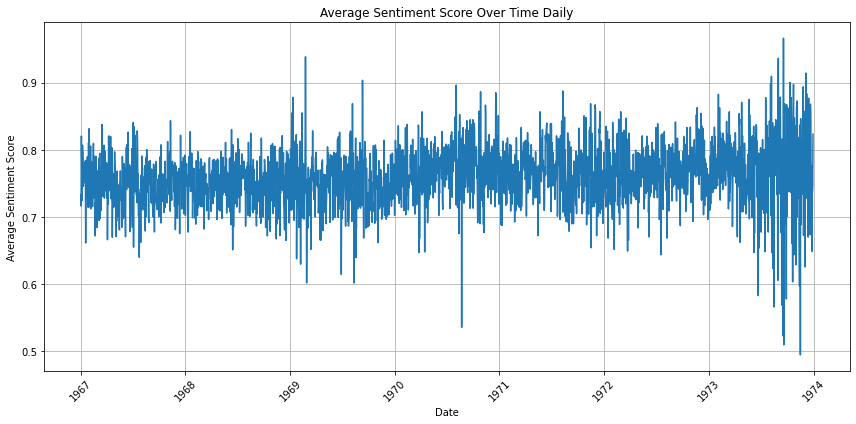

In [63]:
# Step 10: Plot the average sentiment score over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day['date'], average_sentiment_per_day['confidence'])
plt.title('Average Sentiment Score Over Time Daily')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)

# # Formatting the date on x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Step 10: Apply Gaussian filter to smooth the sentiment scores
sigma = 2  # You can adjust the sigma value to control the amount of smoothing
average_sentiment_per_day['smoothed_confidence'] = gaussian_filter1d(average_sentiment_per_day['confidence'], sigma=sigma)

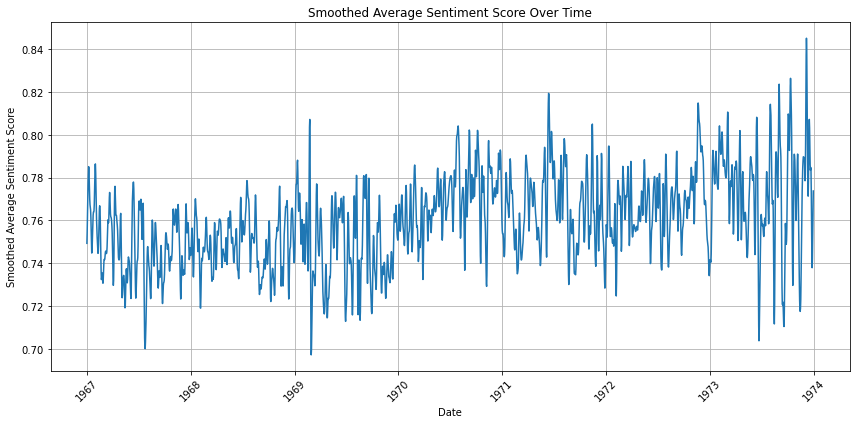

In [62]:
# Step 11: Plot the average sentiment score over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day['date'], average_sentiment_per_day['smoothed_confidence'])
plt.title('Smoothed Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Smoothed Average Sentiment Score')
plt.grid(True)

# # Formatting the date on x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()